# Assignment 2

# Exercise 1 - Classification

"Churn Rate" is a business term describing the rate at which customers leave or cease paying for a product or service. It's a critical figure in many businesses. Understanding what keeps customers engaged is valuable. Consequently, there's growing interest among companies to develop better churn-detection techniques. Predicting churn is particularly important for businesses with subscription models such as cell phone, pay-TV, or any type of service in exchange of a subscription fee. 

The data set we'll be using `churn.csv` is real data from a Telecommunications company customer data set. Each row represents a subscribing telephone customer. Each column contains customer attributes such as call minutes used during different times of day, charges incurred for services, lifetime account duration, etc. The last column is the label indicating whether the customer quit the service (1) or is still a customer of the telecom company (0). 

your task:

- Read the data from the file into the appropriate $X$ and $y$ data structures.
- Split the data into a training set and test set (test set size should be 33%)
- Scale the data using the StandardScaler class from scikit-learn
- Train a logistic regression model and estimate its performance on the test data
- Train a K nearest neighbors classifier and estimate its performance on the test data
- Train a support vector machine classifier (using a radial basis function as kernel) and estimate its performance on the test data
- Print out a confusion matrix for the support vector machine classifier
- Print out a classification report for the support vector machine classifier (displaying precision, recall and f1-score)
- Plot an ROC curve for the logistic regression model classifier

# Exercise 1 - Classification solution

Logistic Regression Model Score:  0.861818181818
K Nearest Neighbours Score (9 Neighbours):  0.894545454545
Support Vector Machine Score:  0.912727272727

Predicted     0   1   All
Actual                   
0           931  15   946
1            81  73   154
All        1012  88  1100

             precision    recall  f1-score   support

          0       0.92      0.98      0.95       946
          1       0.83      0.47      0.60       154

avg / total       0.91      0.91      0.90      1100



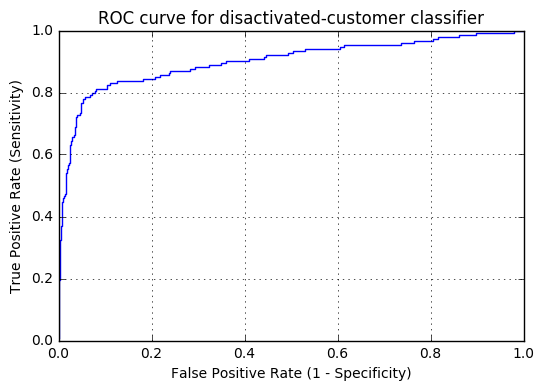

In [7]:
#Read the data from the file into the appropriate XX and yy data structures.
import pandas as pd
data = pd.read_csv('churn.csv', index_col=0)

import numpy as np
from sklearn.utils import shuffle
X = np.array(data.ix[:,0:17])
y = np.array(data.ix[:,17])
X, y = shuffle(X, y, random_state=1)

#Scale the data using the StandardScaler class from scikit-learn.
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

#Split the data into a training set and test set (test set size should be 33%)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

#Train a logistic regression model and estimate its performance on the test data
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()
logRegModel.fit(X_train, y_train)
print("Logistic Regression Model Score: ",logRegModel.score(X_test, y_test))

#Train a K nearest neighbors classifier and estimate its performance on the test data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)  
knn.fit(X_train, y_train)
print("K Nearest Neighbours Score (9 Neighbours): ", knn.score(X_test, y_test))

#Train a support vector machine classifier (using a radial basis function as kernel) and estimate its performance on the test data
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(C=1,kernel='rbf')
clf.probability = True
clf.fit(X_train, y_train)
print("Support Vector Machine Score: ", clf.score(X_test, y_test))

#Print out a confusion matrix for the support vector machine classifier
import pandas as pd
y_pred = clf.predict(X_test)
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print()
print(df_confusion)

#Print out a classification report for the support vector machine classifier (displaying precision, recall and f1-score)
from sklearn import metrics
y_pred = clf.predict(X_test)
print()
print(metrics.classification_report(y_test, y_pred))

#Plot an ROC curve for the logistic regression model classifier
%matplotlib inline
import matplotlib.pyplot as plt
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for disactivated-customer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Exercise 2 – Regularization

Using the Boston house prices [data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):

- Fit a linear regression model using Ridge regularization 
- Fit a linear regression models using Lasso regularization
- Print out the coefficients of each model.
- In your own words, describe what is most striking difference between the coefficients of both models.

I provide you with some initial code to get you started:

In [3]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl

from sklearn.datasets import load_boston
boston = load_boston()

X = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exercise 2 – Regularization Solution

In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np

from sklearn.datasets import load_boston
boston = load_boston()

X = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Unregularised model score: ",lr.score(X_test, y_test))
print('Coefficients:\n'+' '.join(['%.2f,' % c for c in lr.coef_]))
print()
ridgeModel = Ridge(alpha=1.0)
ridgeModel.fit(X_train, y_train) 
print("Ridge regularised model score: ",ridgeModel.score(X_test, y_test))
print('Coefficients:\n'+' '.join(['%.2f,' % c for c in ridgeModel.coef_]))
print()
lassoModel = Lasso(alpha=0.1)
lassoModel.fit(X_train, y_train);
print("Lasso regularised model score: ",lassoModel.score(X_test, y_test))
print('Coefficients:\n'+' '.join(['%.2f,' % c for c in lassoModel.coef_]))
print()
print("As expected, the ridge model shrinks the coefficients towards 0, and the lasso model shrinks to 0. The most striking difference in this implementation is the regularisation of the 5th feature (NOX: nitric oxides concentration.) While both models penalise NOX, the lasso model shrinks it all the way to zero - effectively removing it from the model, indicating it as an irrelevant feature.")  


Unregularised model score:  0.668482575397
Coefficients:
-0.11, 0.03, 0.04, 2.79, -17.24, 4.43, -0.01, -1.45, 0.26, -0.01, -0.92, 0.01, -0.51, 0.00,

Ridge regularised model score:  0.665960807526
Coefficients:
-0.11, 0.03, 0.01, 2.55, -9.56, 4.46, -0.01, -1.34, 0.25, -0.01, -0.83, 0.01, -0.52, 0.00,

Lasso regularised model score:  0.656705559418
Coefficients:
-0.10, 0.03, -0.02, 0.92, -0.00, 4.31, -0.02, -1.15, 0.24, -0.01, -0.73, 0.01, -0.57, 0.00,

As expected, the ridge model shrinks the coefficients towards 0, and the lasso model shrinks to 0. The most striking difference in this implementation is the regularisation of the 5th feature (NOX: nitric oxides concentration.) While both models penalise NOX, the lasso model shrinks it all the way to zero - effectively removing it from the model, indicating it as an irrelevant feature.


# Exercise 3 – Machine Vision

- Create an application that monitors a video stream from the web camera and accurately tracks a wall clock if it appears anywhere on the image. I will use the following image to test your application, so make sure your application works well with it.

<img src="./images/wallclock.jpg" width="100" height="100" />


# Exercise 3 – Machine Vision Solution

In [3]:
import sys
import cv2

#Create a clock cascade
cascPath = './classifier WallClock.xml'
clockCascade = cv2.CascadeClassifier(cascPath)

#Set the video source to the default webcam
cap = cv2.VideoCapture(0) 

while(True):

    ret, frame = cap.read() #Capture frame-by-frame. 
    if not ret : continue   #needed to avoid empty buffer errors
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #search for the clock in the captured frame.
    faces = clockCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
        
    )

    # Draw a rectangle around clocks
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)   
        
    # Display the resulting frame
    cv2.imshow('frame',frame)
    
    #Exit script when 'q' is pushed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

# Exercise 4 - Natural Language Processing

The file `smsData.csv` contains a bunch of real SMSes messages together with a label/target (1 for spam messages, 0 for non-spam messages). The following code reads the data from the file to the object `data`. Your task is:

- Split the data to a training set (75% of the available data) and a test set (25% of the available data) 
- Use the feature extraction `CountVectorizer` to transform the data into a document-term matrix 
- Use the proper classifier (check out the notebook from the natural language processing class to find out  which one) to obtain a fitted model that is able to predict the class of a message (spam or not spam) in the test set (your goal is to get an accuracy around or above 98%).

In [1]:
import pandas as pd
import numpy as np
#import encoding
#encoding=codecs.BOM_UTF8
path = 'smsData.csv'
data = pd.read_csv(path, sep=',', encoding='utf-8', header=None, names=['target', 'messageText'])
X = data['messageText'];
y = data['target'];
#Split the data to a training set (75% of the available data) and a test set (25% of the available data)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Use the feature extraction CountVectorizer to transform the data into a document-term matrix

# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

# learn the 'vocabulary' of the training data
vect.fit(X_train)
dtm = vect.transform(X_train)

#Use the proper classifier (check out the notebook from the natural language processing class to find out which one) to obtain a fitted model that is able to predict the class of a message (spam or not spam) in the test set (your goal is to get an accuracy around or above 98%).
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),
                    ('tfidf', TfidfTransformer(use_idf = True)),
                    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                    alpha=0.001, n_iter=5, random_state=42)),])
_ = text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(np.mean(predicted == y_test)) 

# Exercise 4 - Natural Language Processing Solution

# Exercise 5 - Signal Processing

Revise the Python notebook for the signal processing lecture, specifically the subsection titled "Seeing sound! where a time domain and frequency domain representations of an `ah` vowel sound signal are plotted. Take a look at the variable name "fft_mag" in Spyder. It is an array of frequency magnitudes present in the sound signal. You can extract the relevant
information using the following line of code. 

In [8]:
Xrow = (np.array(fft_mag[0:5000])[:,0]).reshape(1,5000)

`Xrow` represents a single row of a feature matrix $X$. I provide you with with 10 .wav files of me uttering the words "one" and "two". Iterate through each example and construct a feature matrix $X$ where each row is the frequency representation of a single file.

- Use the LogisticRegressionCV estimator and k-fold cross validation with k=3, to provide an estimation of the predictive ability of your estimator to discriminate the sound "one" from the sound "two". Your goal is to get an accuracy around or above 95%

# Exercise 5 - Signal Processing Solution

In [8]:
import scipy
import numpy as np    
import scipy.io.wavfile
import os

nfeatures = 5000
X = np.empty([0,nfeatures])
y = np.empty([1,0])
for filename in os.listdir('audio_files'):
     (sample_rate, input_signal) = scipy.io.wavfile.read(os.path.join('audio_files',filename))#read in .wav file
     fft_out = np.fft.rfft(input_signal)
     fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]

     Xrow = (np.array(fft_mag[0:nfeatures])[:,0]).reshape(1,nfeatures)#create row
     X = np.append(X, Xrow, axis=0) #append row to feature matrix
     
     #create target matrix
     if "one" in filename: 
         y = np.append(y, 1)
     elif "two" in filename:
         y = np.append(y, 2) 

#shuffle dataset         
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=1)

from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import cross_val_score

cv = cross_val_score(LogisticRegressionCV(), X_scaled, y, cv=3)
print(cv.mean())

0.861111111111


# Exercise 6 - Twitter API

- Using the Twitter API and the twitter Python module, programmatically retrieve and print out the latest 5 tweets from the account NASA (@NASA). Make sure to include your own keys to the twitter API in the code snippet. 

# Exercise 6 - Twitter API Solution

In [4]:
import twitter
#use your own API credentials here
api = twitter.Api(consumer_key="Uw5Z12aBJpsAk7m8R3Uy1cQAm",
                  consumer_secret="c4mdFmI4y1K5m2DStHbkFA2WKd9XarwRRM2832k7n5owiumXQ6",
                      access_token_key="788582005789319168-SaskZxvKTIDCLgBR1KdegVXVTXd70Jx",
                  access_token_secret="kqaIKMx8YpYMvvjoAWicQn9j6c7IOJrjui7TvLdkedqtx")

results = api.GetSearch(raw_query="from=NASA&count=5")
#print(results)
for r in results:
    print(r.text,"\n")

Have you voted? @NASA_Astronauts on @Space_Station have! Learn how they cast their ballot for #Election2016:… https://t.co/rXzVu3Jdqf 

It's true! They #voted while they floated.  Learn how @NASA_Astronauts cast their ballot for #Election2016:… https://t.co/pxfdW44lhU 

Good morning America! Today's #ElectionDay. Here’s a look at our country on this Blue Marble. Remember to go vote t… https://t.co/3GuaceF0RJ 

RT @NASAJPL: Starting this month, @NASA is launching a suite of 6 next-generation small satellite missions to observe our planet https://t.… 

In this @CassiniSaturn view, methane clouds are seen moving across northern regions of Saturn’s largest moon Titan:… https://t.co/8z7ZBQTJvk 



# Exercise 7 - K Means

Given the following artificial data set which is unlabeled:

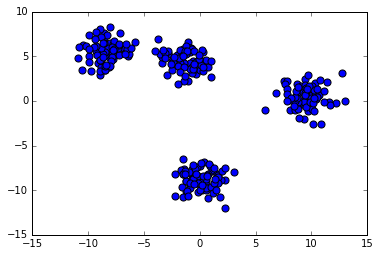

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=7, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], s=50);

- Use the K-means algorithm included in scikit-learn using k=4 clusters to fit the data $X$ above and plot the data color coded for the estimated cluster each data point belongs to.

Your final plot should look something like the following figure:

![](images/clustering.png)

# Exercise 7 - K Means Solution

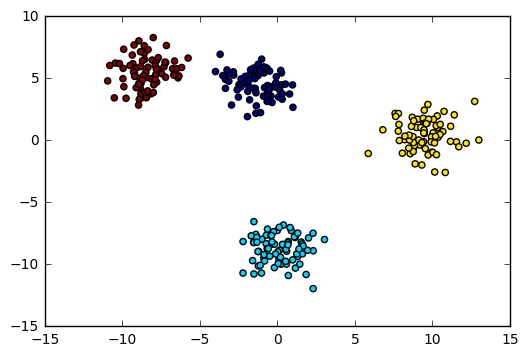

In [3]:
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=7, cluster_std=1.2)
            
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=8) 
y_predicted = kmeans.fit(X).labels_ #y_predicted contains the estimated group belonging of each data point
plt.scatter(X[:,0], X[:,1], c=y_predicted);

# Exercise 8 - Principal Component Analysis

We first create 200 random two-dimensional data points. The data points are sampled from a multinomial normal distribution.
You don't have to understand precisely how to do this. Simply understand that the following code snippet creates some synthetic data:

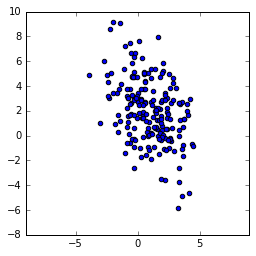

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(seed=3)
Cov = np.array([[2.9, -2.2], [-2.2, 6.5]])
X = np.random.multivariate_normal([1,2], Cov, size=200)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1])
plt.axis('equal') # equal scaling on both axis;
plt.show()

- Use PCA to find out the 2 principal components of the data in `X`. Please, print out those 2 components and the percentage of variance explained by each one of those components.

# Exercise 8 - Principal Component Analysis Solution

In [2]:
#Use PCA to find out the 2 principal components of the data in X. 
#Please, print out those 2 components and the percentage of variance explained by each one of those components.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print("First principal component:", pca.components_[0])
print("Percentage of variance explained:",pca.explained_variance_ratio_[0])
print()
print("Second principal component:", pca.components_[1])
print("Percentage of variance explained:",pca.explained_variance_ratio_[1])

First principal component: [-0.36320602  0.93170886]
Percentage of variance explained: 0.770979868267

Second principal component: [-0.93170886 -0.36320602]
Percentage of variance explained: 0.229020131733


# Exercise 9 - Validation

- In your own words, explain what the last two lines of code do in the following code snippet:

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
cv = cross_val_score(KNeighborsClassifier(1), X, y, cv=10)
cv.mean()

0.97614938602520218

# Exercise 9 - Validation Solution

In [2]:
"""
The cross_val_score method creates a train/test split of the X y data.
It trains the KNeighbours Classifier with the training portion.
It then evaluates the performance of the classifier on the testing portion, returning a score.
It performs this logic for 10 iterations (as defined by the last parameter), each time using a different fold of the training data for validation. 
All scores are saved to the array cv.

The second line returns the mean of those scores.
"""

# Exercise 10 - Watson

# Using IBM Watson services, create a script that:

- Detects the language in the following string of text
- translates the language from the original language to English
- synthesizes the result translation into a male voice in English and writes that to a wav file.

> Parlare è facile. Mostrami il codice


# Exercise 10 - Watson Solution

In [18]:
import json
from watson_developer_cloud import LanguageTranslatorV2

#Initialise language translation object
language_translator = LanguageTranslatorV2(
    username='9ce5b342-e945-42c3-9ed9-1fdf6aa366e2',
    password='33EOQRsQBnO0')

inputphrase = 'Parlare è facile. Mostrami il codice'
data = language_translator.identify(inputphrase) #returns a dict of languages and associated confidence ratings
language = data['languages'][0]['language'] #save the language with the highest confidence rating
print("Phrase language: ",language)

translation = json.dumps(language_translator.translate(inputphrase, source=language, target='en'), indent=2,
                 ensure_ascii=False) #translate the given phrase into english
print("Translation: ",translation)

#Initialise test to speech object
from os.path import join, dirname
from watson_developer_cloud import TextToSpeechV1

text_to_speech = TextToSpeechV1(
    username='fc0d7118-c7cd-45d4-a352-d2ba794472a1',
    password='zdLCXDKdgtQv',
    x_watson_learning_opt_out=True)

#create a file called 'output.wav' of a male voice reading outloud the translation phrase
__file__ = ''
with open(join(dirname(__file__), 'output.wav'), 'wb') as audio_file:
    audio_file.write(text_to_speech.synthesize(translation, accept='audio/wav', voice="en-US_MichaelVoice"))

---------------------------------------------

# Deliverables

- You should hand in a single python notebook .ipynb (use this notebook template) containing all the necessary code to answer each of the previously enumerated tasks. 
- I recommend that you use the Spyder IDE to work on each exercise individually. Once you have a solution worked out, copy and paste the code into the corresponding code snippet placeholder.
- Include comments in the code to clarify what you are doing. Use comments also to provide answers to each task when appropriate.
- Please, make sure your code runs smoothly so I can execute it in my computer.
- Name your file according to the following pattern: yourLastName_DSMI_A2.ipynb
- Drop the file containing your assignment in the swallow box at location M:\Assessments Swallow Box\IN726001DataScienceAndMachineIntelligence\Assignment2
- The due date for handing in Assignment 2 is Monday the 14th of November at 5pm.

**Final note**: If you get a good grade in this assignment, you should feel very confident and very proud about the skills you have acquired in the field of data mining/machine learning. The skills/knowledge required to carry out some of the exercises above are not trivial.